In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [4]:
import tarfile
import urllib

In [5]:
data = pd.read_csv("diabetes.csv")

In [6]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
%matplotlib inline

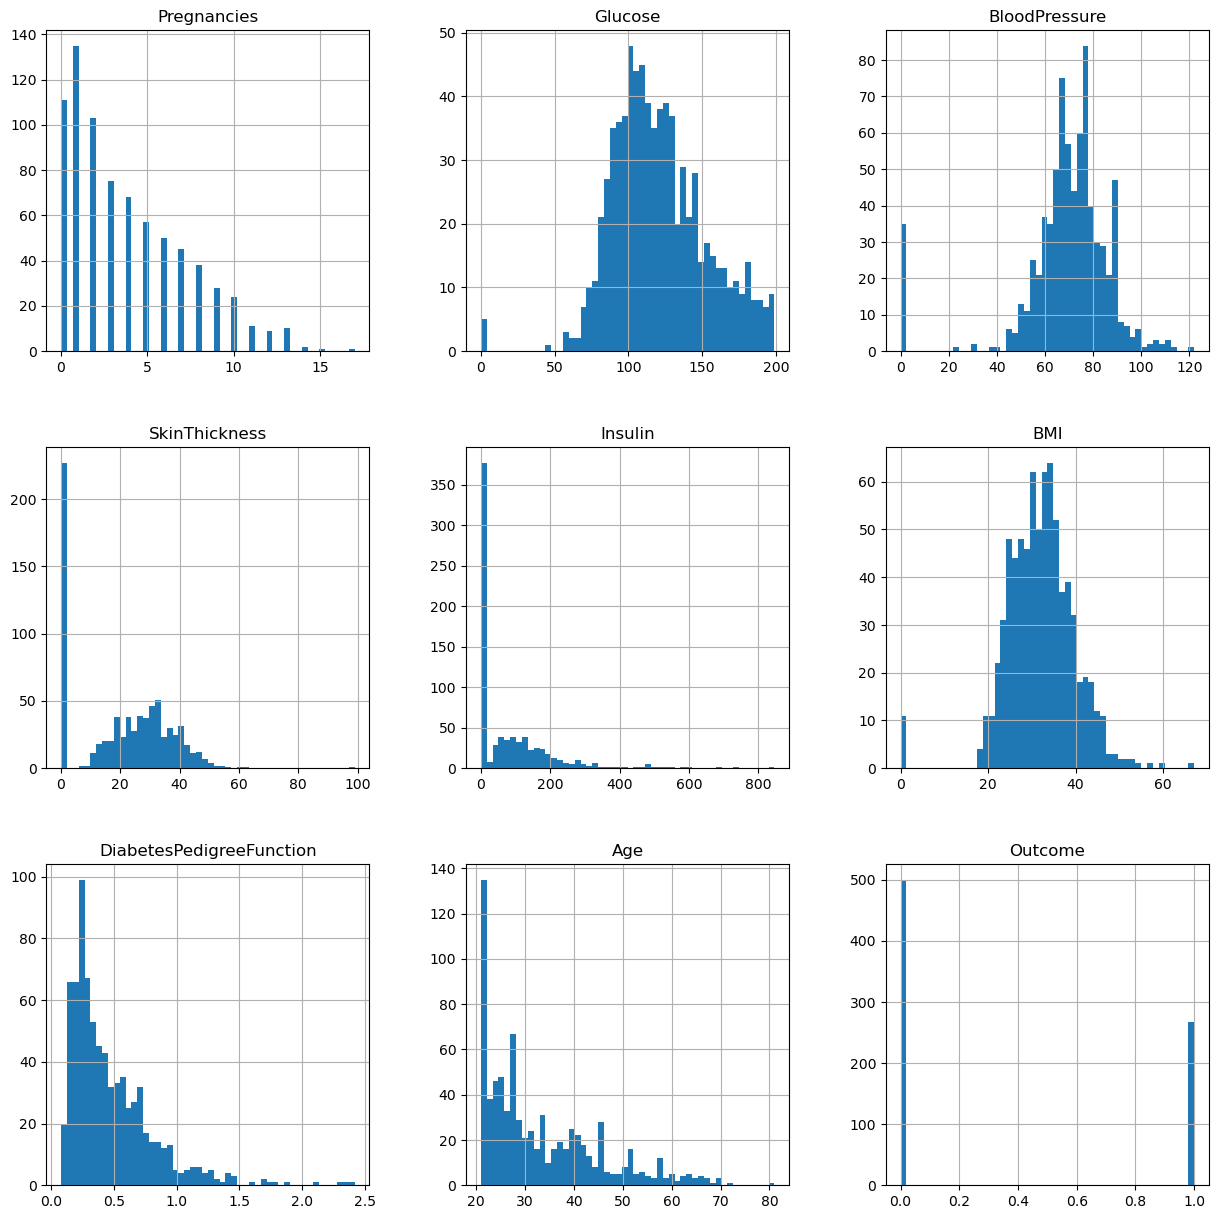

In [10]:
data.hist(bins=50,figsize=(15,15))
plt.show();

In [11]:
print("BMI range:", data["BMI"].min(), data["BMI"].max()) 
print("DiabetesPedigreeFunction range:", data.DiabetesPedigreeFunction.min(),data.DiabetesPedigreeFunction.max())
print("Age range:", data.Age.min(),data.Age.max() )

BMI range: 0.0 67.1
DiabetesPedigreeFunction range: 0.078 2.42
Age range: 21 81


In [12]:
def split_train_test(data,test_ratio,random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(test_ratio * len(data))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

train_set,test_set = split_train_test(data,0.2)
print("Train set length:", len(train_set))
print("Test set length:", len(test_set))

Train set length: 615
Test set length: 153


In [13]:
from zlib import crc32
def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier) & 0xffffffff) < test_ratio

def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]


In [14]:
data_with_id = data.reset_index()
train_set,test_set = split_train_test_by_id(data_with_id,0.2,"index")

In [15]:
data_with_id['Glucosulin_index'] = data.Glucose * 1000 + data.Insulin
train_set,test_set = split_train_test_by_id(data_with_id,0.2,"Glucosulin_index")

In [16]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(data,test_size = 0.2,random_state = 42 )

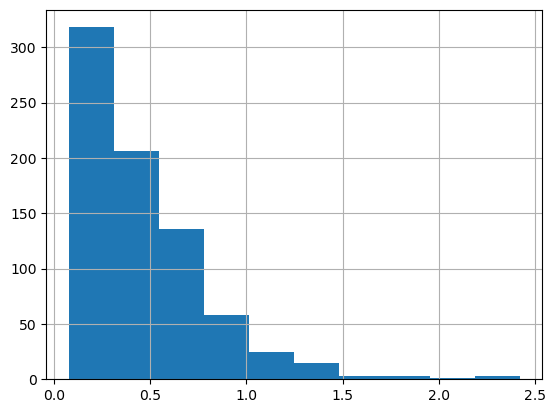

In [17]:
data.DiabetesPedigreeFunction.hist();

In [18]:
data['DiabetesCategory'] = pd.cut(data['DiabetesPedigreeFunction'],bins=[0.,1.5,3,4.5,6, np.inf],labels=[1,2,3,4,5])

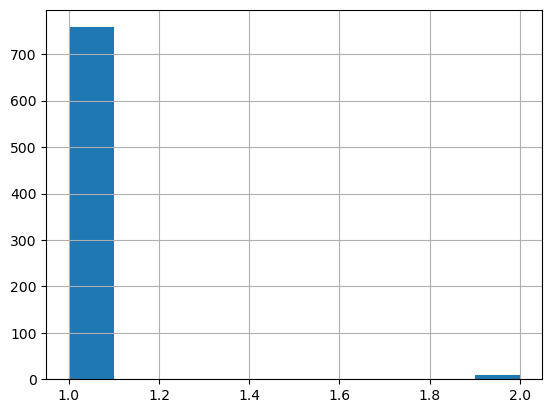

In [19]:
data.DiabetesCategory.hist();

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(data,data['DiabetesCategory']):
    print(train_index)
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

[764 753 760 130 338  59 218 411 454 450 593 455 452 115 324 210 699 316
 367 294 150  79 329 465 636 307 744 389 457 615 590 449 735 619 606 195
 526 515 702 214 614 763 426 538 726 383 158 557 537 176 731 451 472 739
 278 271 295 363 623 326 354 755 664 418 536 167 139  85 529 368 637 612
  78 505 403 754 111 541 520 674 527 320 289  76 387 638 436 327 229 116
 533 291 369 265 429 602 522 670 477 267 120 308 371 458 558 540 704 189
 732 227 543 566 551 586 716 328 508 200 440 304 402 138 348 447 686 697
 419 188 412 290 758 145 632 237 235 275 507 443 486  10 446 296 100  75
 737 708 311 351 331 375  93 243 199 584 336 225 701 205 400 705  38 279
   8 302 476 641 392 688 180 107 668 514 232 213 438 597 587 567 129 633
 238 659 251 453  37 118 494 394 427  44 323 712  82 749 415  86   4 146
 259   6 703 175 431 461 647 221 276 337 177 228 263 297  73 588 103 298
 665  91 677 143 350  43  68 257 550 207 196 555  97 575 253 433 161 132
 390 720 617 182 714 134 464 650 439 715 724 148 34

In [21]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("DiabetesCategory",axis=1,inplace=True)

In [22]:
data = strat_train_set.copy()

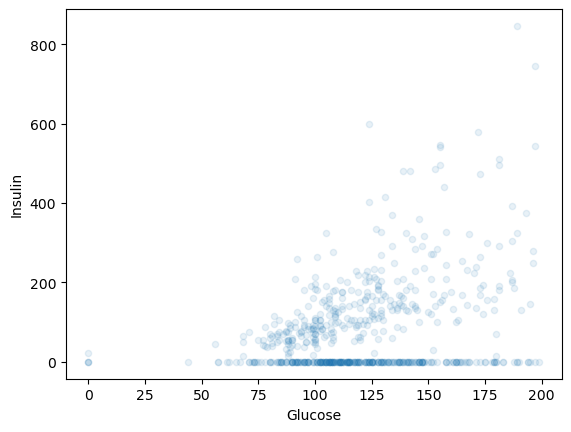

In [23]:
data.plot(kind='scatter',x='Glucose',y = 'Insulin',alpha = 0.1);

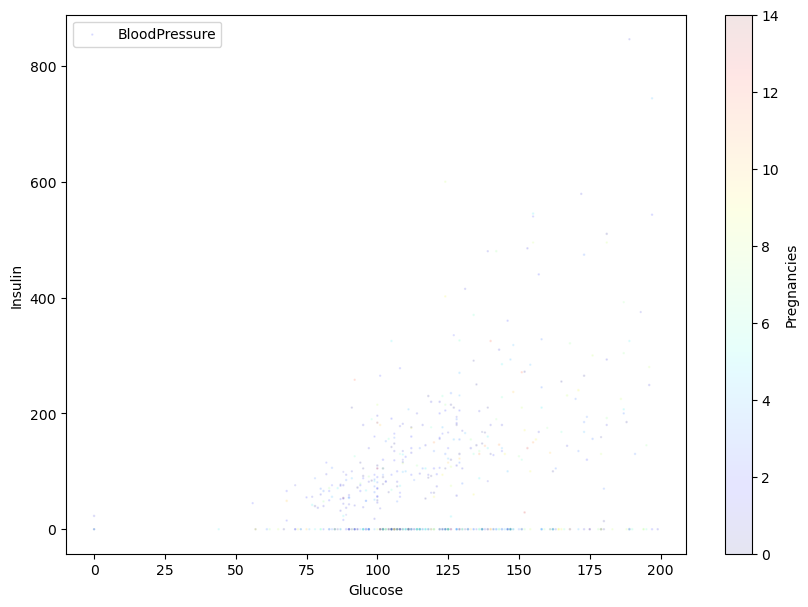

In [24]:
data.plot(kind='scatter',x='Glucose',y = 'Insulin',alpha = 0.1,s=data['BloodPressure']/100,label='BloodPressure',figsize=(10,7),c='Pregnancies',cmap = plt.get_cmap('jet'),colorbar=True)
plt.legend()

In [25]:
corr_matrix = data.corr()
corr_matrix['Pregnancies'].sort_values(ascending=False)

Pregnancies                 1.000000
Age                         0.515302
Outcome                     0.241458
BloodPressure               0.156249
Glucose                     0.122225
BMI                         0.029412
DiabetesPedigreeFunction   -0.020668
Insulin                    -0.028322
SkinThickness              -0.050714
Name: Pregnancies, dtype: float64

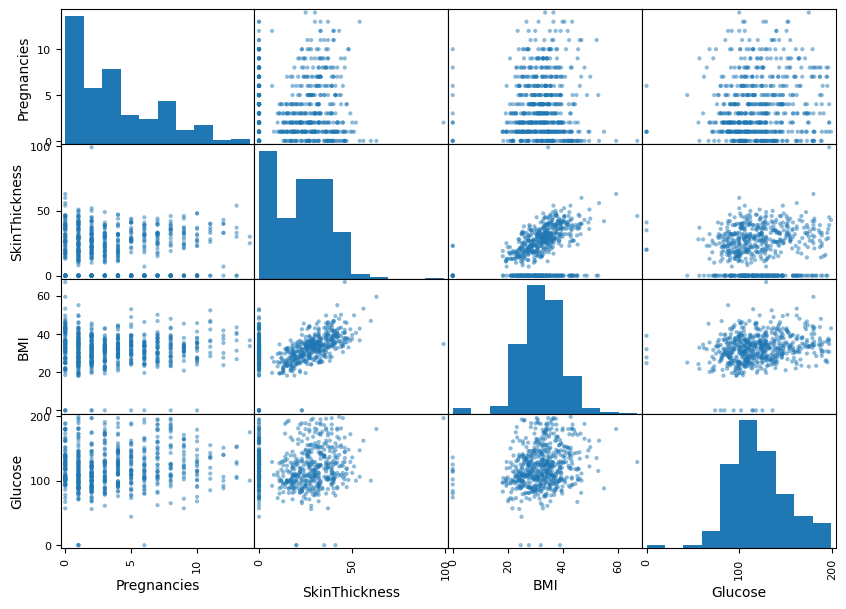

In [26]:
from pandas.plotting import scatter_matrix

attributes = ['Pregnancies','SkinThickness','BMI','Glucose']
scatter_matrix(data[attributes],figsize=(10,7));

<AxesSubplot:xlabel='SkinThickness', ylabel='Pregnancies'>

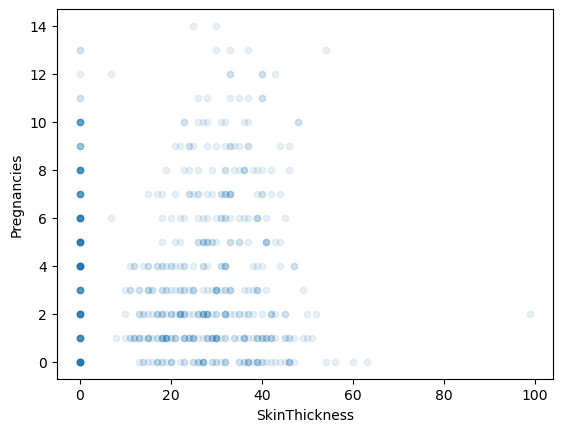

In [27]:
data.plot(kind='scatter',x='SkinThickness',y='Pregnancies',alpha=0.1)

In [28]:
data['PregnanciesPerAge'] = data['Pregnancies'] / data['Age']
data['GlucosePerPregnancies'] = data['Glucose'] / data.Pregnancies
data['SkinThicknessPerAge'] = data['SkinThickness'] / data.Age

In [29]:
corr_matrix = data.corr()
corr_matrix['Pregnancies'].sort_values(ascending=False)

Pregnancies                 1.000000
PregnanciesPerAge           0.920559
Age                         0.515302
Outcome                     0.241458
BloodPressure               0.156249
Glucose                     0.122225
BMI                         0.029412
DiabetesPedigreeFunction   -0.020668
Insulin                    -0.028322
SkinThickness              -0.050714
SkinThicknessPerAge        -0.288238
GlucosePerPregnancies      -0.716163
Name: Pregnancies, dtype: float64

In [30]:
needed_features = ['SkinThickness','PregnanciesPerAge','GlucosePerPregnancies','BMI','Insulin','Glucose']

In [31]:
data = strat_train_set.drop('Pregnancies',axis=1)
housing_labels = strat_train_set['Pregnancies'].copy()

In [32]:
data.dropna(subset=['BMI'])
data.drop('BMI',axis = 1)
median = data['BMI'].median()
data.BMI.fillna(median,inplace=True)

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [34]:
data_num = data.drop('DiabetesPedigreeFunction',axis = 1)
imputer.fit(data_num)
imputer.statistics_ == data_num.median().values

array([ True,  True,  True,  True,  True,  True,  True])

In [35]:
X = imputer.transform(data_num)

In [36]:
data_tranformed = pd.DataFrame(X, columns=data_num.columns,index=data_num.index)
data_tranformed

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
764,122.0,70.0,27.0,0.0,36.8,27.0,0.0
753,181.0,88.0,44.0,510.0,43.3,26.0,1.0
760,88.0,58.0,26.0,16.0,28.4,22.0,0.0
130,173.0,70.0,14.0,168.0,29.7,33.0,1.0
338,152.0,78.0,34.0,171.0,34.2,33.0,1.0
...,...,...,...,...,...,...,...
521,124.0,80.0,33.0,130.0,33.2,26.0,0.0
193,135.0,0.0,0.0,0.0,52.3,40.0,1.0
672,68.0,106.0,23.0,49.0,35.5,47.0,0.0
24,143.0,94.0,33.0,146.0,36.6,51.0,1.0


In [37]:
data_category = data[['DiabetesPedigreeFunction']]
data_category

,DiabetesPedigreeFunction
764,0.340
753,0.222
760,0.766
130,0.361
338,0.893
...,...
521,0.305
193,0.578
672,0.285
24,0.254


In [38]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [39]:
category_encoded = ordinal_encoder.fit_transform(data_category)
category_encoded[:10]

array([[167.],
       [ 83.],
       [357.],
       [176.],
       [386.],
       [ 51.],
       [418.],
       [258.],
       [245.],
       [209.]])

In [40]:
ordinal_encoder.categories_

[array([0.078, 0.084, 0.085, 0.088, 0.089, 0.092, 0.096, 0.1  , 0.101,
        0.102, 0.107, 0.108, 0.115, 0.118, 0.121, 0.122, 0.123, 0.126,
        0.127, 0.128, 0.129, 0.13 , 0.133, 0.134, 0.137, 0.14 , 0.141,
        0.142, 0.143, 0.144, 0.147, 0.148, 0.149, 0.15 , 0.151, 0.153,
        0.154, 0.156, 0.157, 0.158, 0.159, 0.16 , 0.161, 0.162, 0.163,
        0.164, 0.165, 0.166, 0.167, 0.17 , 0.171, 0.173, 0.174, 0.175,
        0.176, 0.177, 0.178, 0.18 , 0.183, 0.186, 0.187, 0.189, 0.19 ,
        0.191, 0.192, 0.194, 0.196, 0.197, 0.198, 0.199, 0.2  , 0.204,
        0.205, 0.206, 0.207, 0.209, 0.21 , 0.212, 0.215, 0.217, 0.218,
        0.219, 0.22 , 0.222, 0.223, 0.225, 0.226, 0.227, 0.229, 0.231,
        0.232, 0.233, 0.234, 0.235, 0.236, 0.237, 0.238, 0.239, 0.24 ,
        0.243, 0.244, 0.245, 0.246, 0.247, 0.248, 0.249, 0.251, 0.252,
        0.253, 0.254, 0.255, 0.256, 0.257, 0.258, 0.259, 0.26 , 0.261,
        0.262, 0.263, 0.265, 0.267, 0.268, 0.27 , 0.271, 0.272, 0.277,
      

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin
SkinThickness_ix,Glucose_ix,Age_idx,Pregnancies_ix = 3,4,5,6

class CombinedAttributeAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_GlucosePerPregnancies = False):
        self.add_GlucosePerPregnancies =add_GlucosePerPregnancies

    def fit(self,X,y = None):
        return self

    def transform(self,X,y=None):
        PregnanciesPerAge = X[:,Pregnancies_ix] / X[:,Age_idx]
        SkinThicknessPerAge = X[:, SkinThickness_ix] / X[:,Age_idx]
        if self.add_GlucosePerPregnancies:
            GlucosePerPregnancies = X[:, Glucose_ix] / X[:, Pregnancies_ix]
            return np.c_[X,PregnanciesPerAge,SkinThicknessPerAge]
        else:
            return np.c_[X,PregnanciesPerAge,SkinThicknessPerAge]

In [42]:
additive_transformer = CombinedAttributeAdder(add_GlucosePerPregnancies = False)
data_extra_attributes = additive_transformer.transform(data.values)

In [43]:
data_extra_attributes

array([[1.22000000e+02, 7.00000000e+01, 2.70000000e+01, ...,
        0.00000000e+00, 7.94117647e+01, 0.00000000e+00],
       [1.81000000e+02, 8.80000000e+01, 4.40000000e+01, ...,
        1.00000000e+00, 1.17117117e+02, 2.29729730e+03],
       [8.80000000e+01, 5.80000000e+01, 2.60000000e+01, ...,
        0.00000000e+00, 2.87206266e+01, 2.08877285e+01],
       ...,
       [6.80000000e+01, 1.06000000e+02, 2.30000000e+01, ...,
        0.00000000e+00, 1.64912281e+02, 1.71929825e+02],
       [1.43000000e+02, 9.40000000e+01, 3.30000000e+01, ...,
        1.00000000e+00, 2.00787402e+02, 5.74803150e+02],
       [1.96000000e+02, 7.60000000e+01, 2.90000000e+01, ...,
        1.00000000e+00, 9.42148760e+01, 4.62809917e+02]])

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [45]:
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributeAdder()),
    ('std_scaler', StandardScaler())
])

data_num_transformed = pipeline.fit_transform(data_num)

In [46]:
data_num_transformed

array([[ 0.03313985,  0.0450955 ,  0.37637518, ..., -0.7552036 ,
        -0.70942686, -0.70718257],
       [ 1.89730779,  0.96126361,  1.43873434, ...,  1.32414623,
         1.86597055,  4.33824957],
       [-1.04112642, -0.56568324,  0.31388347, ..., -0.7552036 ,
        -0.70942686, -0.52011486],
       ...,
       [-1.67304775,  1.87743172,  0.12640832, ..., -0.7552036 ,
        -0.70942686, -0.43901901],
       [ 0.69665725,  1.26665298,  0.75132547, ...,  1.32414623,
         0.60352084,  0.02916731],
       [ 2.37124879,  0.35048487,  0.50135861, ...,  1.32414623,
         0.46531582,  0.55634498]])

In [49]:
from sklearn.compose import ColumnTransformer
num_attributes = list(data_num)
cat_attributes = ['DiabetesPedigreeFunction']

full_pipeline = ColumnTransformer([
    ("num", pipeline,num_attributes),
])


data_prepared = full_pipeline.fit_transform(data)

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data_prepared,housing_labels)

LinearRegression()

In [68]:
some_data = data.iloc[:5]
data_labels = housing_labels.iloc[:5]
data_prepared_some = full_pipeline.transform(some_data)
print("Прогнозы:", model.predict(data_prepared_some))
print("Метки:",list(data_labels))

Прогнозы: [2.80668726 1.67107662 2.37435102 4.04860824 4.22323939]
Метки: [2, 0, 2, 4, 9]


In [69]:
from sklearn.metrics import mean_squared_error

data_prepared = full_pipeline.transform(data)
data_predictions = model.predict(data_prepared)
linear_mse = mean_squared_error(housing_labels, data_predictions)
lin_rmse = np.sqrt(linear_mse)
print(lin_rmse)

2.748431218208171


In [70]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(data_prepared,housing_labels)

DecisionTreeRegressor()

In [71]:
data_predictions = tree_regressor.predict(data_prepared)
linear_mse = mean_squared_error(housing_labels, data_predictions)
lin_rmse = np.sqrt(linear_mse)
print(lin_rmse)

0.0


In [72]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_regressor,data_prepared,housing_labels,scoring='neg_mean_squared_error') # функция считает utility функцию или функцию качества, которая является противоположностью функции потерь

scores = np.sqrt(-scores)

In [73]:
def display_scores(scores):
    print("Оценки:",scores)
    print("Среднее:", scores.mean())
    print("Стандартное отклонение:",scores.std())

display_scores(scores)

Оценки: [3.59990966 3.7934475  3.80948751 3.85298955 3.60555128]
Среднее: 3.732277099578249
Стандартное отклонение: 0.10756889233379059


In [74]:
lin_scores = cross_val_score(model,data_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
scores = np.sqrt(-lin_scores)
display_scores(scores)

Оценки: [3.18066261 2.86982917 2.47686859 3.10597041 3.05029665 2.88106399
 2.65821996 2.98185242 1.99715092 2.88507827]
Среднее: 2.808699298439193
Стандартное отклонение: 0.33485097733947894


In [75]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(data_prepared,housing_labels)
forest_rmse = mean_squared_error(housing_labels, forest_model.predict(data_prepared))
print(np.sqrt(forest_rmse))
forest_rmse_scores = cross_val_score(model, data_prepared,housing_labels,scoring='neg_mean_squared_error')
display_scores(np.sqrt(-forest_rmse_scores))

0.9919387622949929
Оценки: [3.01753329 2.82309474 2.94301422 2.76411256 2.48306139]
Среднее: 2.806163240106634
Стандартное отклонение: 0.18431235863301187


In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'n_estimators':[3,10,30], 'max_features':[2,4,7]
    }, 
    {
        'bootstrap':[False],'n_estimators':[3,10,30],'max_features':[2,3,4]   
    }
]

regressor = RandomForestRegressor()
grid_search = GridSearchCV(regressor,param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(data_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 7],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [77]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [85]:
cv_res = grid_search.cv_results_
for mean_score,params in zip(cv_res['mean_test_score'],cv_res['params']):
    print(np.sqrt(-mean_score), params)

3.000864467883844 {'max_features': 2, 'n_estimators': 3}
2.848806484707542 {'max_features': 2, 'n_estimators': 10}
2.663835256574966 {'max_features': 2, 'n_estimators': 30}
2.904666739603089 {'max_features': 4, 'n_estimators': 3}
2.792769672151642 {'max_features': 4, 'n_estimators': 10}
2.6836658463843777 {'max_features': 4, 'n_estimators': 30}
3.0523699159910596 {'max_features': 7, 'n_estimators': 3}
2.797837910698816 {'max_features': 7, 'n_estimators': 10}
2.6792032300706103 {'max_features': 7, 'n_estimators': 30}
3.0644524531553956 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2.8268994303260353 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
2.7504936962352864 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
2.9865130912103095 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.8642240289971532 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
2.810602639597691 {'bootstrap': False, 'max_features': 3, 'n_estimators': 30}
3.01086

In [86]:
feature_importances = grid_search.best_estimator_.feature_importances_
display(feature_importances)
extra_attributes = ["PregnanciesPerAge", 'SkinThicknessPerAge', "GlucosePerPregnancies"]
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attributes + extra_attributes + cat_one_hot_attribs
display(sorted(zip(feature_importances,attributes),reverse=True))

array([0.10722945, 0.11172889, 0.08485437, 0.05054303, 0.13123313,
       0.35168365, 0.01994909, 0.09487083, 0.04790756])

KeyError: 'cat'

In [88]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('DiabetesPedigreeFunction',axis=1)
y_test = strat_test_set['DiabetesPedigreeFunction'].copy()
X_test_preprocessed = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_preprocessed)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

3.930049442774877


In [89]:
from scipy import stats

confidence = 0.95

squared_errors = (final_predictions - y_test) ** 2

np.sqrt(stats.t.interval(confidence,len(squared_errors) - 1,loc = squared_errors.mean(),scale = stats.sem(squared_errors)))

array([3.582917  , 4.24891551])

In [90]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf',gamma='scale',C = 0.1)
svr_model.fit(data_prepared,housing_labels)
print("Raw estimations:")
svr_squared_errors = mean_squared_error(housing_labels, svr_model.predict(data_prepared))
svr_rmse_score = np.sqrt(svr_squared_errors)
display_scores(svr_rmse_score)
print("cross val score")
scores = cross_val_score(svr_model,data_prepared,housing_labels,scoring='neg_mean_squared_error')
display_scores(np.sqrt(-scores))

Raw estimations:
Оценки: 2.8299911453822615
Среднее: 2.8299911453822615
Стандартное отклонение: 0.0
cross val score
Оценки: [3.07514564 2.88565105 2.8922802  3.08688719 2.63049431]
Среднее: 2.914091677894814
Стандартное отклонение: 0.16583651126140017


In [91]:
svr_predictions = svr_model.predict(X_test_preprocessed)
svr_mse = mean_squared_error(y_test,svr_predictions)
svr_rmse = np.sqrt(svr_mse)
print(svr_rmse)

3.011058967492981


In [92]:
svr_params = [
    {
        'kernel':['linear'], 'C':[0.01,0.1,1,10,100]
    },
    {
        'kernel':['rbf'],'C':[0.01,0.1,1,10,100],'gamma':['scale',0.1,0.01,0.001,0.0001]
    },
]
model = SVR()
grid_search_svr = GridSearchCV(model,param_grid=svr_params,cv=5, scoring='neg_mean_squared_error',return_train_score=True,n_jobs= -1,verbose=2)
grid_search_svr.fit(data_prepared,housing_labels)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': ['scale', 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [93]:
grid_search_svr.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [94]:
cv_res = grid_search_svr.cv_results_
for mean_score,params in zip(cv_res['mean_test_score'],cv_res['params']):
    print(np.sqrt(-mean_score), params)

2.897614139398285 {'C': 0.01, 'kernel': 'linear'}
2.8075875934522285 {'C': 0.1, 'kernel': 'linear'}
2.821373934995778 {'C': 1, 'kernel': 'linear'}
2.8225260315288323 {'C': 10, 'kernel': 'linear'}
2.823923818029972 {'C': 100, 'kernel': 'linear'}
3.297467040878219 {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
3.2961452741704274 {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
3.358990306760405 {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
3.3972222247268045 {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
3.401792164955885 {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
2.918806614978657 {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
2.917217289828852 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
3.1741286678754035 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
3.35317111840798 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
3.397153829438181 {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
2.6268862982311094 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
2.6279351513888276 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
2.7868

In [95]:
negative_score = grid_search_svr.best_score_
print("RMSE Score: ", np.sqrt(-negative_score))

RMSE Score:  2.6268862982311094


In [96]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal,expon
params_distribution = {
    'kernel':['linear','rbf'],
    'C': reciprocal(20,20000),
    'gamma':expon(scale=1.0) 
}
model = SVR()
randomized_search_svr = RandomizedSearchCV(svr_model,param_distributions=params_distribution,n_iter=50,cv = 5,scoring='neg_mean_squared_error',verbose=2 ,random_state=42,n_jobs =-1)
randomized_search_svr.fit(data_prepared,housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=SVR(C=0.1), n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000272782E0B20>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000027278D5F880>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [97]:
randomized_search_svr.best_params_

{'C': 13082.421055385465, 'gamma': 0.0007790692366582295, 'kernel': 'rbf'}

In [98]:
cv_res = randomized_search_svr.cv_results_
for mean_score,params in zip(cv_res['mean_test_score'],cv_res['params']):
    print(np.sqrt(-mean_score), params)

2.824034696874098 {'C': 265.8583788632432, 'gamma': 3.010121430917521, 'kernel': 'linear'}
3.157204545832081 {'C': 4366.193678104918, 'gamma': 0.9084469696321253, 'kernel': 'rbf'}
2.810396015695998 {'C': 58.750769152656574, 'gamma': 0.059838768608680676, 'kernel': 'rbf'}
2.824045751678462 {'C': 200.5191380457913, 'gamma': 0.15416196746656105, 'kernel': 'linear'}
3.110913972536291 {'C': 23.055974256464793, 'gamma': 3.503557475158312, 'kernel': 'rbf'}
2.698743197352838 {'C': 13082.421055385465, 'gamma': 0.0007790692366582295, 'kernel': 'rbf'}
3.3095442109789928 {'C': 70.99757664393003, 'gamma': 0.3627537294604771, 'kernel': 'rbf'}
2.8231071060906623 {'C': 21.000465008462697, 'gamma': 0.023332523598323388, 'kernel': 'linear'}
5.114262011436647 {'C': 1369.584019114956, 'gamma': 0.15023452872733867, 'kernel': 'rbf'}
7.17673795270654 {'C': 16683.860588281546, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}
2.8247236941092564 {'C': 4534.797304756079, 'gamma': 0.2227358621286903, 'kernel': 'lin

In [99]:
negative_score = grid_search_svr.best_score_
print("RMSE Score: ", np.sqrt(-negative_score))

RMSE Score:  2.6268862982311094


In [100]:
k = 5

In [101]:
def select_top_k_features(features,k):
    return np.sort(np.argpartition(np.array(features), -k)[-k:])

In [102]:
class TopFeatureSelection(BaseEstimator,TransformerMixin):
    def __init__(self,feature_importance,k):
        self.feature_importance = feature_importance
        self.k = k
    def fit(self,X, y = None):
        self.feature_indices_ = select_top_k_features(self.feature_importance,k)
        return self
    def transform(self,X,y=None):
        return X[:,self.feature_indices_]

In [103]:
changed_pipeline = Pipeline([
    ('preprocessing', full_pipeline),
    ('feature_selection', TopFeatureSelection(feature_importances,k))
])

In [104]:
final_pipeline = Pipeline([
    ('preprocessing', changed_pipeline),
    ('model', LinearRegression())
])

final_pipeline.fit(data,housing_labels)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('attribs_adder',
                                                                                    CombinedAttributeAdder()),
                                                                                   ('std_scaler',
                                                                                    StandardScaler())]),
                                                                   ['Glucose',
                                                                    'BloodPressure',
                                                                    'SkinThickness',
                                                                    'Insulin',
                                                                    'BMI',
                                                                    'Age',
                                                                    'Outcome'])])),
                                 ('feature_selection',
                                  TopFeatureSelection(feature_importance=array([0.10722945, 0.11172889, 0.08485437, 0.05054303, 0.13123313,
       0.35168365, 0.01994909, 0.09487083, 0.04790756]),
                                                      k=5))])),
                ('model', LinearRegression())])

In [105]:
some_data = data[:4]
some_labels = housing_labels[:4]
predictions = final_pipeline.predict(some_data)
print("Predictions: ",predictions)
print("Actual Predictions: ",some_labels)
mse = mean_squared_error(some_labels,predictions)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

Predictions:  [2.5260346  3.08700598 2.05583347 3.90154455]
Actual Predictions:  764    2
753    0
760    2
130    4
Name: Pregnancies, dtype: int64
RMSE:  1.56677448818023


In [106]:
params = [{
'preprocessing__preprocessing__num__imputer__strategy':['mean','median','most_frequent'],
'preprocessing__feature_selection__k':list(range(1, len(feature_importances) + 1))
}]

grid_search = GridSearchCV(final_pipeline,params,cv = 5,scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(data,housing_labels)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=mean; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, preprocessing__preprocessing__num__imputer__strategy=median; total time=   0.0s
[CV] END preprocessing__feature_selection__k=1, prep

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('preprocessing',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer(strategy='median')),
                                                                                                          ('attribs_adder',
                                                                                                           CombinedAttributeAdder()),
                                                                                                          ('std_scaler',
                                                                                                           StandardScaler())]),
                                                                                          ['Glucose',
                                                                                           'BloodPressure',
                                                                                           'SkinThickness',
                                                                                           'Insulin',
                                                                                           'BMI',
                                                                                           'Age',
                                                                                           'Outcome'])]))...
                                                         TopFeatureSelection(feature_importance=array([0.10722945, 0.11172889, 0.08485437, 0.05054303, 0.13123313,
       0.35168365, 0.01994909, 0.09487083, 0.04790756]),
                                                                             k=5))])),
                                       ('model', LinearRegression())]),
             param_grid=[{'preprocessing__feature_selection__k': [1, 2, 3, 4, 5,
                                                                  6, 7, 8, 9],
                          'preprocessing__preprocessing__num__imputer__strategy': ['mean',
                                                                                   'median',
                                                                                   'most_frequent']}],
             scoring='neg_mean_squared_error', verbose=2)

In [107]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('attribs_adder',
                                                                                    CombinedAttributeAdder()),
                                                                                   ('std_scaler',
                                                                                    StandardScaler())]),
                                                                   ['Glucose',
                                                                    'BloodPressure',
                                                                    'SkinThickness',
                                                                    'Insulin',
                                                                    'BMI',
                                                                    'Age',
                                                                    'Outcome'])])),
                                 ('feature_selection',
                                  TopFeatureSelection(feature_importance=array([0.10722945, 0.11172889, 0.08485437, 0.05054303, 0.13123313,
       0.35168365, 0.01994909, 0.09487083, 0.04790756]),
                                                      k=1))])),
                ('model', LinearRegression())])

In [108]:
grid_search.best_params_

{'preprocessing__feature_selection__k': 1,
 'preprocessing__preprocessing__num__imputer__strategy': 'mean'}

In [109]:
np.sqrt(-grid_search.best_score_)

2.816778600258857